In [1]:
print("Project name: Student Performance Analysis")

Project name: Student Performance Analysis


In [2]:
# A brief of dataset

In [3]:
'''
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student 
grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two 
datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).
Data set can be downloaded from http://archive.ics.uci.edu/ml/datasets/Student+Performance#
'''

'\nThis data approach student achievement in secondary education of two Portuguese schools. The data attributes include student \ngrades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two \ndatasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).\nData set can be downloaded from http://archive.ics.uci.edu/ml/datasets/Student+Performance#\n'

In [4]:
# Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [6]:
# Importing dataset

In [7]:
mat = pd.read_csv("C://Users//acer//Downloads//student//mat.csv", sep=';')
por = pd.read_csv("C://Users//acer//Downloads//student//por.csv", sep=';')

In [8]:
# shape of both data set

In [9]:
print(mat.shape)
print(por.shape)

(395, 33)
(649, 33)


In [10]:
# Listing column names

In [11]:
print(mat.columns)
print(por.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [12]:
# we can concat both dataframes

In [13]:
df=pd.concat([mat,por],axis=0)

In [14]:
# shape of new dataset

In [15]:
df.shape

(1044, 33)

In [16]:
# as this dataset contains 33 col, we will use this option to see all columns 

In [17]:
pd.pandas.set_option('display.max_columns',None)

In [18]:
# Lets look at the first few rows 

In [19]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [20]:
# last few rows 

In [21]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


In [22]:
# info of dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-null

In [24]:
# Basic stats value 

In [25]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [26]:
# A brief of dataset

In [27]:
pd.DataFrame({"TotalMissing":df.isna().sum(),"%Missing":df.isna().mean(),"DataType":df.dtypes,"Unique":df.nunique()})

,TotalMissing,%Missing,DataType,Unique
school,0,0.0,object,2
sex,0,0.0,object,2
age,0,0.0,int64,8
address,0,0.0,object,2
famsize,0,0.0,object,2
Pstatus,0,0.0,object,2
Medu,0,0.0,int64,5
Fedu,0,0.0,int64,5
Mjob,0,0.0,object,5
Fjob,0,0.0,object,5


In [28]:
# We dont have any null values 

In [29]:
# Lets rename columns for easy access and easy understanding of attributes

In [30]:
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [31]:
# Final score can be thought of as our dependent variable

In [32]:
# Lets create a new col as finalgrade,ie we are classifying students on the basis of marks
# Excellent:15-20,Good:10-14,Average:5-9,Poor:0-4

In [33]:
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'excellent' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 5) & (df.final_score <= 9), 'final_grade'] = 'average'
df.loc[(df.final_score >=0) & (df.final_score <=4), 'final_grade'] = "poor"
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,average
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,average
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,good
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,excellent
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,good


In [34]:
# Lets explore data

In [35]:
# Lets use countplot to see how many students are in which grade

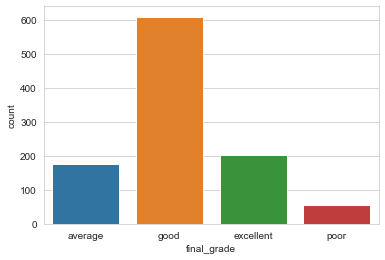

In [36]:
sns.countplot(x=df["final_grade"],data=df)

In [37]:
# Inference: a majority of students are in good category

In [38]:
# Heat map

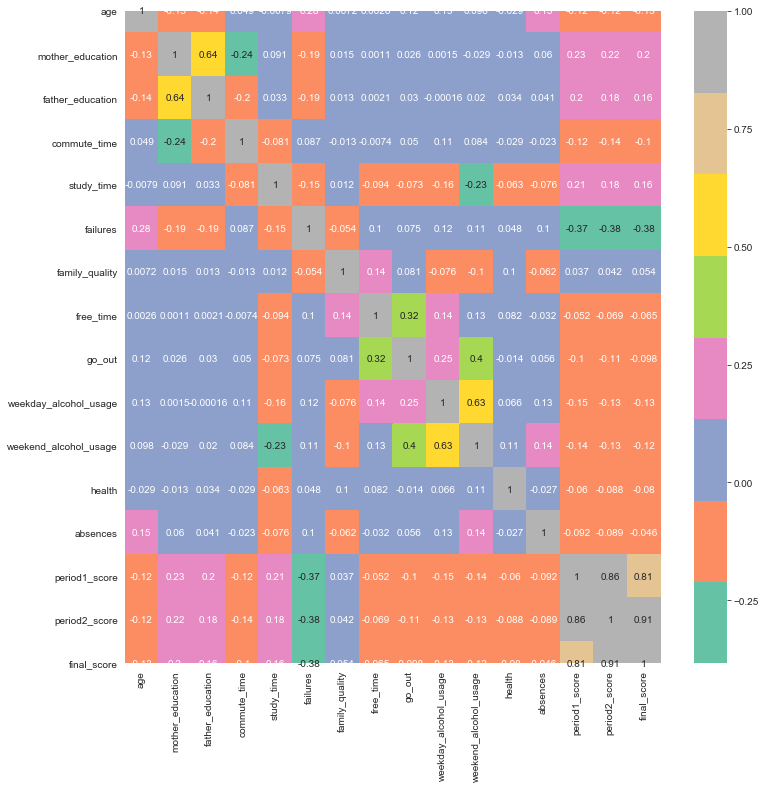

In [39]:
fig=plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="Set2")

In [40]:
# Lets see if there is any effect of romantic relationship on studies

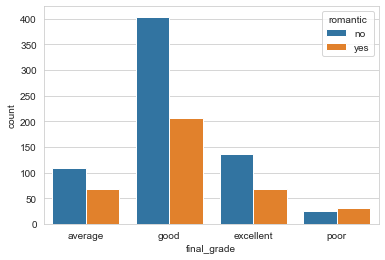

In [41]:
sns.countplot(x=df["final_grade"],hue="romantic",data=df)

In [42]:
# Inference: A big YES, relationship destroys studies

In [43]:
rom=pd.crosstab(index=df.final_grade,columns=df.romantic)

In [44]:
sm.stats.Table(rom).test_nominal_association().pvalue # Short way

0.005939740107671065

In [45]:
# A bit long way
romtab=sm.stats.Table(rom)
romres=romtab.test_nominal_association()
romres.pvalue

0.005939740107671065

In [46]:
# This implies no relationship should be made during studies

In [47]:
# Lets see whether alcohol affects studies

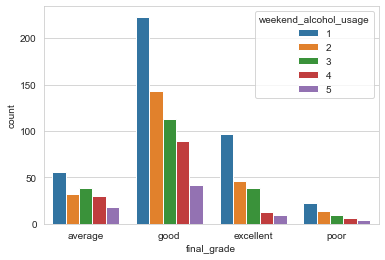

In [48]:
sns.countplot(x=df["final_grade"],hue=df['weekend_alcohol_usage'],data=df)

In [49]:
# This indicates a student consuming high which is indicated by 5 scores less than others
# We can say as the level of alcohol consumption increases grade decreases

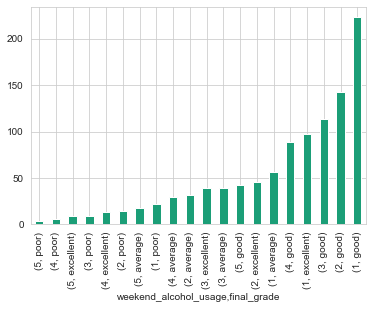

In [50]:
df.groupby(["weekend_alcohol_usage","final_grade"]).size().sort_values().plot.bar(colormap="Dark2")

In [51]:
# another way of visualizing the same thing,showing same result

In [52]:
# Lets check chi-sq test

In [53]:
alc=pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)

In [54]:
sm.stats.Table(alc).test_nominal_association().pvalue

0.014657921119958783

In [ ]:
# Lets see if parents education has an effect on students education

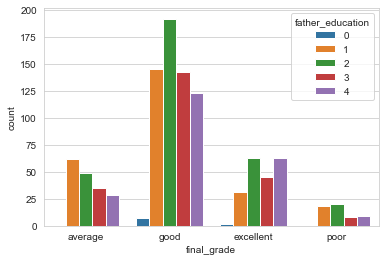

In [55]:
sns.countplot(x=df["final_grade"],hue=df['father_education'],data=df)

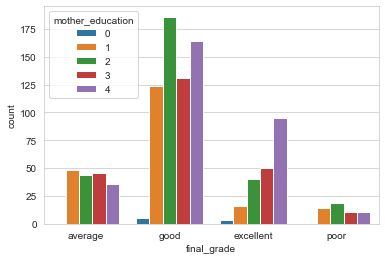

In [57]:
sns.countplot(x=df["final_grade"],hue=df['mother_education'],data=df)

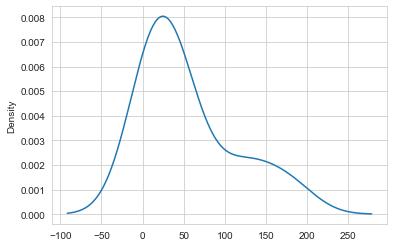

In [61]:
df.groupby(["final_grade","mother_education"]).size().plot(kind="kde")

In [ ]:
# Using OLS to determine coefficients

In [64]:
par_edu=df[["mother_education","father_education"]]
tar=df.final_score
edu=sm.OLS(tar,par_edu)
res_edu=edu.fit()
res_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:09:22   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Inference: mothers education has higher influence on student marks which is shown by coef

In [ ]:
# Lets see whether hanging out affects studies

Text(0.5, 0, 'Frequency of Going Out')

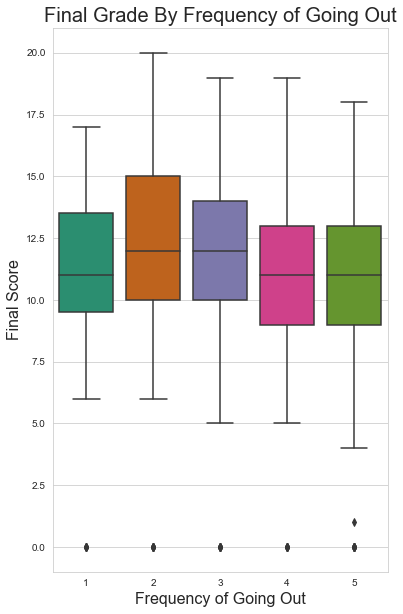

In [66]:
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='Dark2')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

In [ ]:
# another way of looking at this 

Text(0, 0.5, 'Count of students')

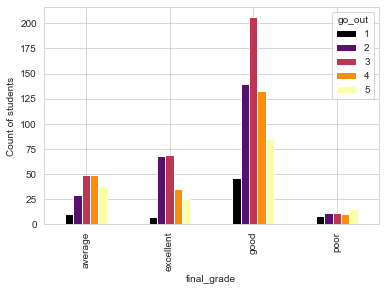

In [74]:
pd.crosstab(index=df.final_grade,columns=df.go_out).plot(kind="bar",colormap="inferno")
plt.ylabel("Count of students")

In [ ]:
# Lets check chi sq test

In [77]:
go=pd.crosstab(index=df.final_grade,columns=df.go_out)

In [78]:
sm.stats.Table(go).test_nominal_association().pvalue

2.9055975796721256e-05

In [ ]:
# Inference:going out reduces performance of students in studies

In [ ]:
# Lets compare results with desire towards higher studies

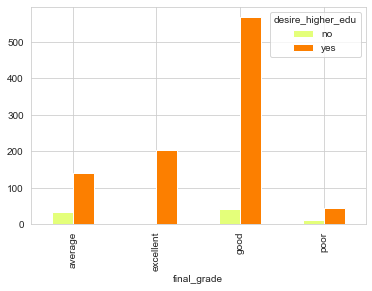

In [83]:
pd.crosstab(index=df.final_grade,columns=df.desire_higher_edu).plot(kind="bar",colormap="Wistia")

In [ ]:
# Lets prove inference through chi sq test

In [85]:
high_edu=pd.crosstab(index=df.final_grade,columns=df.desire_higher_edu)

In [86]:
sm.stats.Table(high_edu).test_nominal_association().pvalue

1.3916645613676337e-12

In [ ]:
# Lets look in a different way to gain much inference

Text(0.5, 0, 'Desire to college')

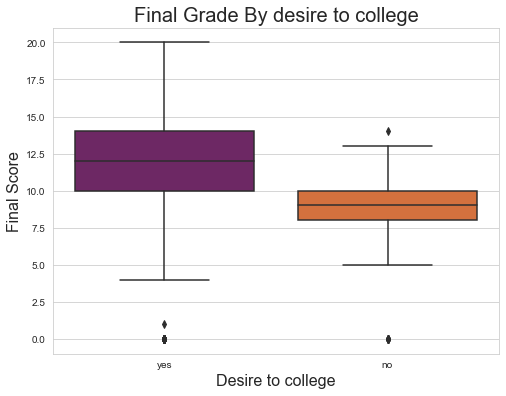

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(x='desire_higher_edu', y='final_score', data=df, palette='inferno')
plt.title('Final Grade By desire to college', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Desire to college', fontsize=16)

In [ ]:
# Inference: Students who desire to go for higher studies tends to perform

In [ ]:
# Lets see whether the living location affects student studies

In [ ]:
# We have two cat of students U:Urban,R:Rural, lets put these value for easy understanding

In [94]:
df.address=df.address.map({"U":"Urban","R":"Rural"})

In [ ]:
# Lets see the proportion of students 

Text(0.5, 1.0, 'Proportion of students')

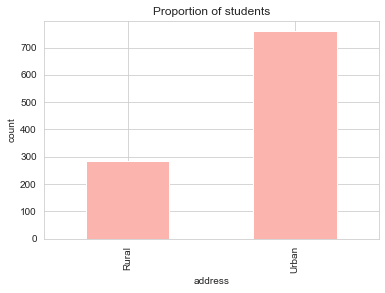

In [111]:
df.groupby("address").size().plot(kind="bar",colormap="Pastel1")
plt.ylabel("count")
plt.title("Proportion of students")

In [113]:
loc=pd.crosstab(index=df.final_grade,columns=df.address)

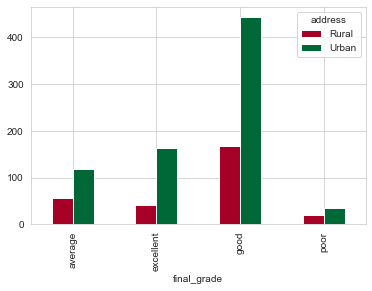

In [116]:
loc.plot(kind="bar",colormap="RdYlGn")

In [ ]:
# A different view to gain insights

Text(0.5, 0, 'Location')

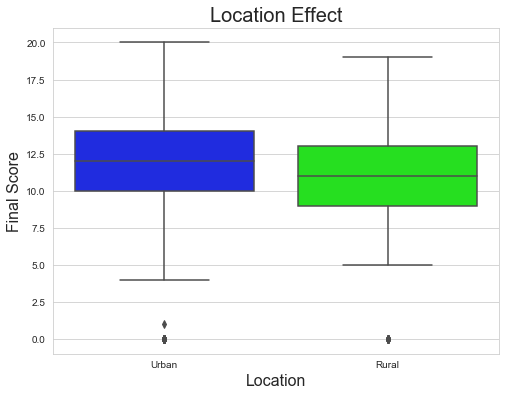

In [124]:
plt.figure(figsize=(8,6))
sns.boxplot(x='address', y='final_score', data=df, palette='hsv_r')
plt.title('Location Effect', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Location', fontsize=16)

In [ ]:
# These graphs clearly says that living in Urban location improves studies, may be 
# students living in rural dont have that facilities to study

In [ ]:
# lets prove our inference with chi sq test

In [125]:
sm.stats.Table(loc).test_nominal_association().pvalue

0.018062110429497236

In [ ]:
# Lets look at other variable OLS

In [126]:
dfl = df.copy()
X_ols = dfl.drop(['period1_score', 'period2_score', 'final_score','final_grade', 'failures','study_time','absences'], axis=1)
X_ols = pd.get_dummies(X_ols)

In [128]:
mod = sm.OLS(df.final_score, X_ols)
mod = mod.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_score   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.440
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           2.15e-21
Time:                        14:00:14   Log-Likelihood:                -2799.5
No. Observations:                1044   AIC:                             5673.
Df Residuals:                    1007   BIC:                             5856.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                      -0.1317      0.106     -1.247      0.213      -0.339       0.076
mother_education          0.2814      0.163      1.724      0.085      -0.039       0.602
father_education          0.0960      0.145      0.661      0.508      -0.189       0.381
commute_time             -0.0778      0.172     -0.451      0.652      -0.416       0.260
family_quality            0.2454      0.126      1.952      0.051      -0.001       0.492
free_time                -0.0709      0.121     -0.589      0.556      -0.307       0.166
go_out                   -0.2610      0.116     -2.255      0.024      -0.488      -0.034
weekday_alcohol_usage    -0.1401      0.167     -0.841      0.400      -0.467       0.187
weekend_alcohol_usage    -0.0508      0.126     -0.402      0.688      -0.299       0.197
health                   -0.2160      0.083     -2.599      0.009      -0.379      -0.053
school_GP                 1.0004      0.189      5.297      0.000       0.630       1.371
school_MS                 0.6030      0.214      2.816      0.005       0.183       1.023
sex_F                     0.9762      0.182      5.358      0.000       0.619       1.334
sex_M                     0.6272      0.192      3.273      0.001       0.251       1.003
address_Rural             0.6024      0.204      2.947      0.003       0.201       1.003
address_Urban             1.0010      0.189      5.302      0.000       0.631       1.372
family_size_GT3           0.5398      0.185      2.914      0.004       0.176       0.903
family_size_LE3           1.0636      0.188      5.651      0.000       0.694       1.433
parents_status_A          0.8303      0.232      3.586      0.000       0.376       1.285
parents_status_T          0.7731      0.228      3.395      0.001       0.326       1.220
mother_job_at_home        0.0977      0.302      0.324      0.746      -0.495       0.690
mother_job_health         0.8261      0.371      2.225      0.026       0.098       1.555
mother_job_other          0.0627      0.221      0.284      0.777      -0.371       0.497
mother_job_services       0.4337      0.238      1.825      0.068      -0.033       0.900
mother_job_teacher        0.1831      0.338      0.542      0.588      -0.480       0.846
father_job_at_home        0.3277      0.426      0.769      0.442      -0.509       1.164
father_job_health         0.2251      0.502      0.449      0.654      -0.760       1.210
father_job_other          0.1472      0.243      0.606      0.545      -0.330       0.624
father_job_services      -0.2284      0.259     -0.882      0.378      -0.736       0.280
father_job_teacher        1.1317      0.431      2.623      0.009       0.285       1.978
reason_course             0.1920      0.195      0.985      0.325      -0.191       0.575
reason_home            

In [ ]:
# lets move towards model building

In [ ]:
# Lets divide our dataset into dependent and independent dataset

In [133]:
y=df["final_grade"]
x=df.drop("final_grade",axis=1)

In [ ]:
# train test split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Lets see tha shape of splitted datset

In [138]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (730, 33)
Shape of y_train: (730,)
Shape of x_test: (314, 33)
Shape of y_test: (314,)


In [ ]:
# encoding all categorical values 

In [140]:
x_train=pd.get_dummies(x_train,drop_first=True)
x_test=pd.get_dummies(x_test,drop_first=True)

In [141]:
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (730, 42)
Shape of y_train: (730,)
Shape of x_test: (314, 42)
Shape of y_test: (314,)


In [ ]:
# encoding target variable

In [143]:
from sklearn import preprocessing

In [145]:
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
# Using decision tree classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Finding minimum samples leaf

In [155]:
msl=[]
for i in range(1,50):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(x_train, y_train)
    ts=t.score(x_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)

In [ ]:
# here we can see that after printing msl that till 

In [158]:
msl.where(msl==msl.max()).dropna() # this will show all values of i which are highest 
# and dropna will delete those records which are not in max

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
dtype: float64

In [ ]:
# Final model

In [161]:
tree = DecisionTreeClassifier(min_samples_leaf=20)
t= tree.fit(x_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(x_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(x_test, y_test))

Decisioin Tree Model Score : 1.0 , Cross Validation Score : 1.0


In [163]:
dt=DecisionTreeClassifier(min_samples_leaf=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [164]:
pd.DataFrame({"Actual":y_test,"Predicted":prediction})

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
...,...,...
309,1,1
310,2,2
311,2,2
312,2,2


In [169]:
from sklearn.metrics import r2_score,f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score

In [171]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

accuracy score is 1.0
Kappa is : 1.0
Sensitiviy is : 1.0
Precision is : 1.0
R2 score is: 1.0
[[ 63   0   0   0]
 [  0  64   0   0]
 [  0   0 171   0]
 [  0   0   0  16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00       171
           3       1.00      1.00      1.00        16

    accuracy                           1.00       314
   macro avg       1.00      1.00      1.00       314
weighted avg       1.00      1.00      1.00       314



c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# Decision tree classifier has perfectly fit our data and given us accuracy of 100%

In [ ]:
# Lets use Random forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# first we will find n_estimators

In [174]:
ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(x_train, y_train)
    fs = f.score(x_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

17    0.990446
dtype: float64

In [ ]:
# Lets find min samples leaf

In [175]:
ne=[]
for i in range(1,60):
    forest = RandomForestClassifier(n_estimators=17, min_samples_leaf=i)
    f = forest.fit(x_train, y_train)
    fs = f.score(x_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

0    0.984076
dtype: float64

In [198]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=1)
f = forest.fit(x_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_test, y_test))

Raondom Forest Model Score : 1.0 , Cross Validation Score : 0.9872611464968153


In [ ]:
# SVC

In [199]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(x_train, y_train)
print("SVC Model Score" , ":" , s.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(x_test, y_test))

SVC Model Score : 0.9917808219178083 , Cross Validation Score : 0.9331210191082803


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [202]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,42):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(x_train,y_train)
    x_new_test=sk.fit_transform(x_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,42)))
ks

1     0.996815
2     0.996815
3     0.993631
4     0.993631
5     0.993631
6     0.050955
7     0.993631
8     0.993631
9     0.745223
10    0.993631
11    0.993631
12    0.990446
13    0.990446
14    0.050955
15    0.993631
16    0.993631
17    0.050955
18    0.050955
19    0.987261
20    0.987261
21    0.977707
22    0.738854
23    0.719745
24    0.713376
25    0.990446
26    0.050955
27    0.050955
28    0.089172
29    0.085987
30    0.089172
31    0.082803
32    0.955414
33    0.949045
34    0.079618
35    0.085987
36    0.092357
37    0.035032
38    0.044586
39    0.035032
40    0.076433
41         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

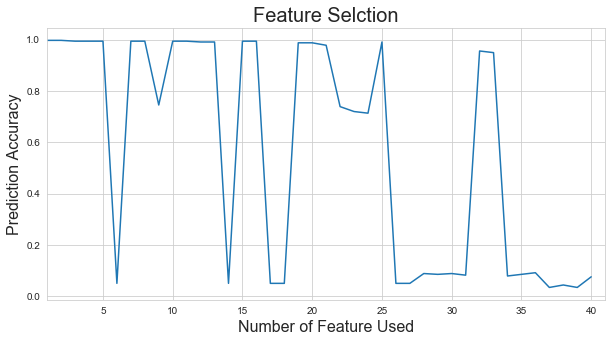

In [203]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [204]:
ks.where(ks==ks.max()).dropna()

1    0.996815
2    0.996815
dtype: float64

In [206]:
# final model
sk = SelectKBest(chi2, k=2)
x_new = sk.fit_transform(x_train,y_train)
x_new_test=sk.fit_transform(x_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.9972602739726028 , Cross Validation Score : 0.9968152866242038


In [ ]:
# Stochastic Gradient Descent Classification

In [207]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(x_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(x_test, y_test))

Stochastic Gradient Descent Model Score : 0.7 , Cross Validation Score : 0.6305732484076433


In [ ]:
# we can say by looking at the prediction accuracy that decision tree classifier 
# fits best on this dataset

In [ ]:
# Thank you